In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log



In [2]:
df =pd.read_csv('datasets_302666_618181_AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [3]:
from pandas.tseries.offsets import BDay

In [4]:
df.shape

(251, 7)

In [5]:
date1 = pd.date_range(start='8/15/2018',end ='8/14/2019',freq=BDay())

In [6]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [7]:
from pandas.tseries.holiday import USFederalHolidayCalendar 
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [8]:
date2 = pd.date_range(start='8/15/2018',end ='8/14/2019',freq=us_bd)

In [9]:
date2.shape

(251,)

In [10]:
df_date = df[['Date','Volume']]
df_date['Time_stamp'] = pd.DataFrame(date2, columns=['Date'])
df_date['Open'] = pd.DataFrame(df,columns=['Open'])
df_date.head()

,Date,Volume,Time_stamp,Open
0,8/15/2018,28807600,2018-08-15,209.220001
1,8/16/2018,28500400,2018-08-16,211.750000
2,8/17/2018,35427000,2018-08-17,213.440002
3,8/20/2018,30287700,2018-08-20,218.100006
4,8/21/2018,26159800,2018-08-21,216.800003


In [11]:
df_date.dtypes

Date                  object
Volume                 int64
Time_stamp    datetime64[ns]
Open                 float64
dtype: object

In [12]:
#Durbin watson test

import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Volume'])

0.13804147049471416

In [13]:
#Durbin watson test value should be either below 1.5 or above 2.5 so that its a time series problem or its aregression proble
#it should contain date and time column
#date column it should be continuous
# there should not be any missin date if its there it should be treated using imputatuion
### check whether we have trend, seasonality, cyclicity and random noise - decomposition method - checked and we have trend and seasonality there
### Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction) - Satisfied

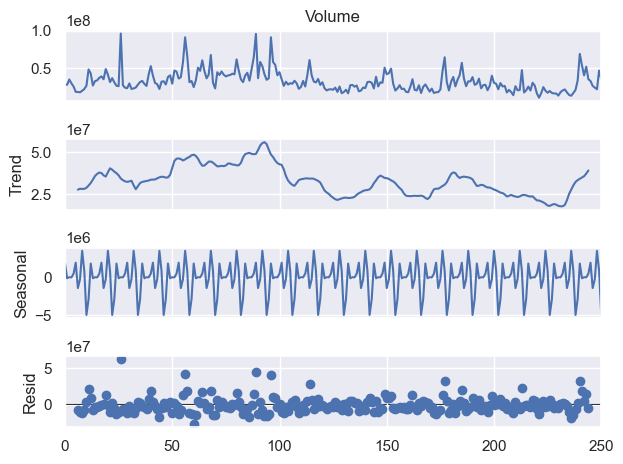

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_date['Volume'],period=12)
decomposition.plot()
plt.show()

In [15]:
df_final = pd.read_csv('datasets_302666_618181_AAPL.csv',parse_dates = True , index_col =0)
df_final.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


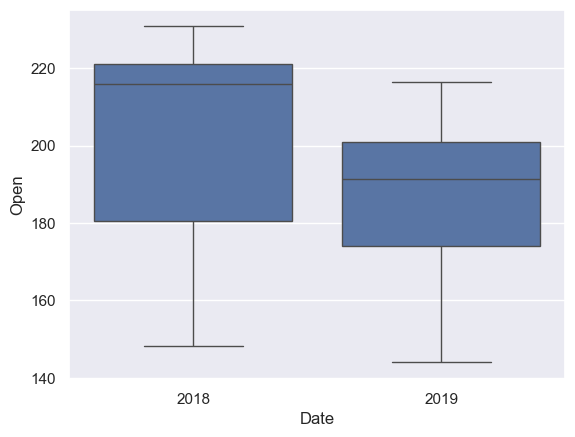

In [17]:
sns.boxplot(x=df_final.index.year,y= df_final['Open'])
plt.show()

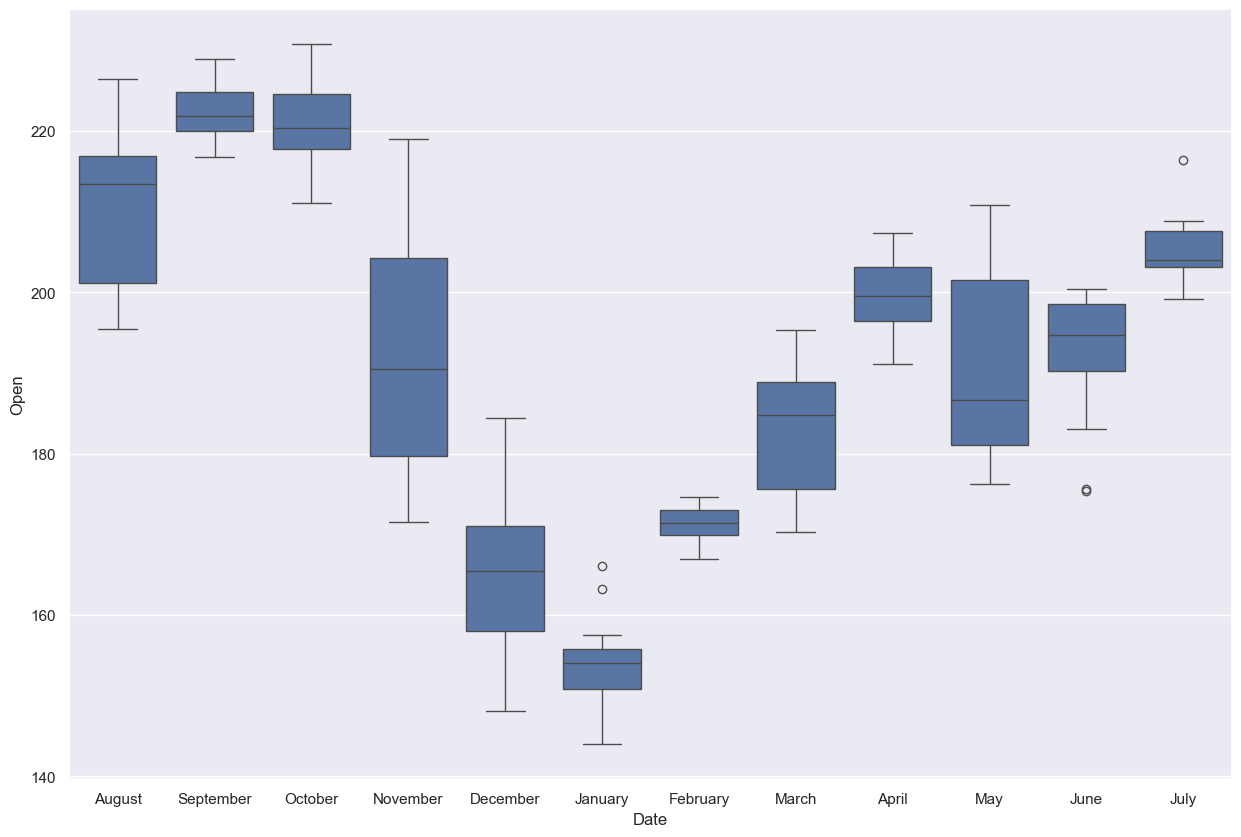

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df_final.index.month_name(),y= df_final['Open'])
plt.show()

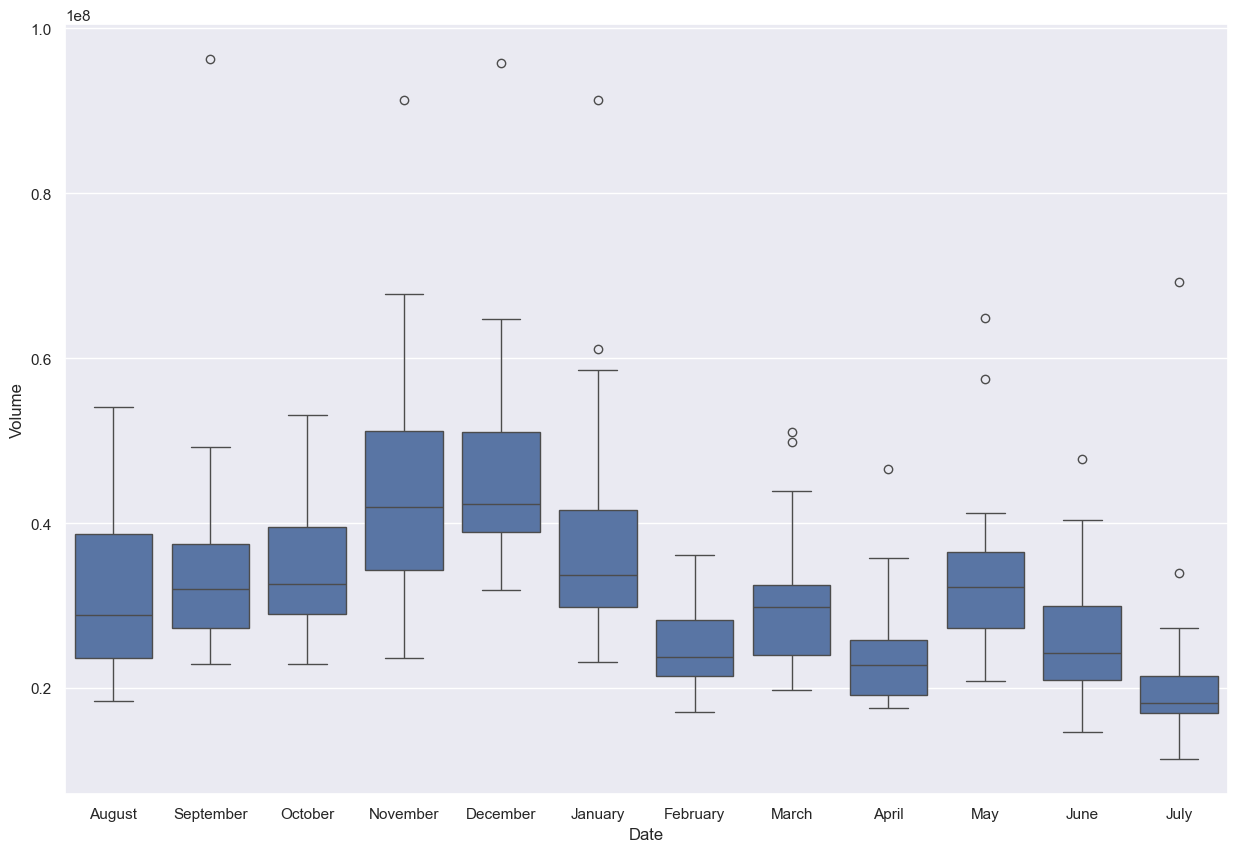

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df_final.index.month_name(),y= df_final['Volume'])
plt.show()

In [20]:
df_final['Month'] = df_final.index.month
df_final['Year'] = df_final.index.year

In [21]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600,8,2018
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400,8,2018
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000,8,2018
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700,8,2018
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800,8,2018


In [22]:
df["Time_stamp"] =pd.to_datetime(df['Date'])
df_final_model = df.set_index('Time_stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_stamp,,,,,,,
2018-08-15,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [23]:
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [24]:
df_final_model['Date'] = pd.to_datetime(df_final_model['Date'])
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB


In [25]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) <pd.to_datetime('2019-06-05')]
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_stamp,,,,,,,
2018-08-15,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [26]:
train.shape

(201, 7)

In [27]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2019-06-05')]
test.shape

(50, 7)

In [28]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [29]:
train_final.head()

,Volume
Time_stamp,
2018-08-15,28807600
2018-08-16,28500400
2018-08-17,35427000
2018-08-20,30287700
2018-08-21,26159800


In [30]:
train_final.tail()

,Volume
Time_stamp,
2019-05-29,28481200
2019-05-30,21218400
2019-05-31,27043600
2019-06-03,40396100
2019-06-04,30968000


In [31]:
test_final.head()

,Volume
Time_stamp,
2019-06-05,29773400
2019-06-06,22526300
2019-06-07,30684400
2019-06-10,26220900
2019-06-11,26932900


In [32]:
test_final.tail()

,Volume
Time_stamp,
2019-08-08,27009500
2019-08-09,24619700
2019-08-12,22474900
2019-08-13,47218500
2019-08-14,36453100


In [33]:
!pip install prophet

In [34]:
import prophet

In [35]:
from prophet import Prophet

In [36]:
model = Prophet()

In [37]:
df_final_model.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [38]:
df_final_model1=df_final_model[['Date','Volume']]
df_final_model1

,Date,Volume
Time_stamp,,
2018-08-15,2018-08-15,28807600
2018-08-16,2018-08-16,28500400
2018-08-17,2018-08-17,35427000
2018-08-20,2018-08-20,30287700
2018-08-21,2018-08-21,26159800
...,...,...
2019-08-08,2019-08-08,27009500
2019-08-09,2019-08-09,24619700
2019-08-12,2019-08-12,22474900


In [39]:
df_final_model1.columns = ['ds','y']
df_final_model1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      251 non-null    datetime64[ns]
 1   y       251 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.9 KB


In [40]:
model.fit(df_final_model1)

23:27:44 - cmdstanpy - INFO - Chain [1] start processing
23:27:44 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future_dates = model.make_future_dataframe(periods=1000)
future_dates.tail()

,ds
1246,2022-05-06
1247,2022-05-07
1248,2022-05-08
1249,2022-05-09
1250,2022-05-10


In [42]:
predict = model.predict(future_dates)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-15,3.518019e+07,1.861588e+07,5.160757e+07,3.518019e+07,3.518019e+07,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,0.0,0.0,0.0,3.575764e+07
1,2018-08-16,3.519278e+07,1.959269e+07,5.388505e+07,3.519278e+07,3.519278e+07,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,0.0,0.0,0.0,3.629997e+07
2,2018-08-17,3.520538e+07,2.176329e+07,5.526210e+07,3.520538e+07,3.520538e+07,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,3.822372e+07
3,2018-08-20,3.524315e+07,2.040464e+07,5.292786e+07,3.524315e+07,3.524315e+07,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,3.667853e+07
4,2018-08-21,3.525575e+07,1.964806e+07,5.211437e+07,3.525575e+07,3.525575e+07,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,0.0,0.0,0.0,3.550325e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2022-05-06,-2.592481e+07,-5.061697e+07,1.959470e+06,-4.717339e+07,-7.102135e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,-2.290647e+07
1247,2022-05-07,-2.597456e+07,-5.686930e+07,-3.831671e+06,-4.724720e+07,-7.127129e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,0.0,0.0,0.0,-2.916749e+07
1248,2022-05-08,-2.602430e+07,-5.767390e+07,-3.362942e+06,-4.730891e+07,-7.152840e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,0.0,0.0,0.0,-2.921723e+07
1249,2022-05-09,-2.607405e+07,-5.155362e+07,1.391880e+06,-4.739446e+07,-7.178633e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,-2.463867e+07


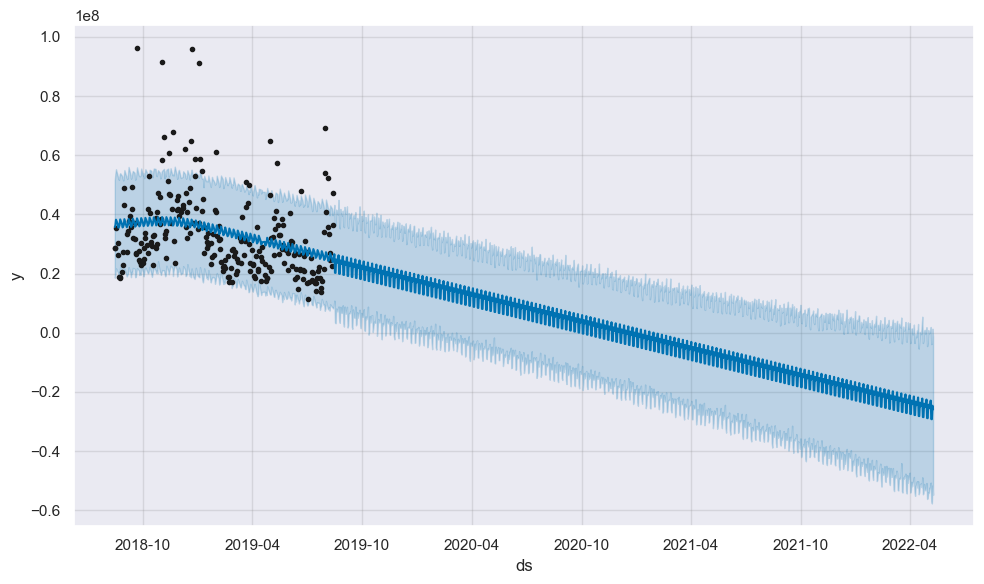

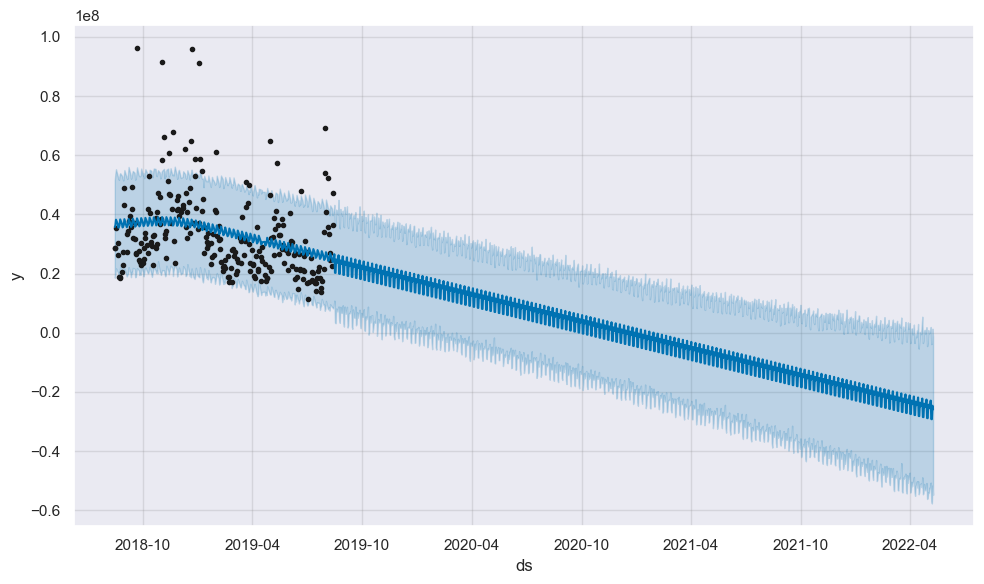

In [43]:
model.plot(predict)

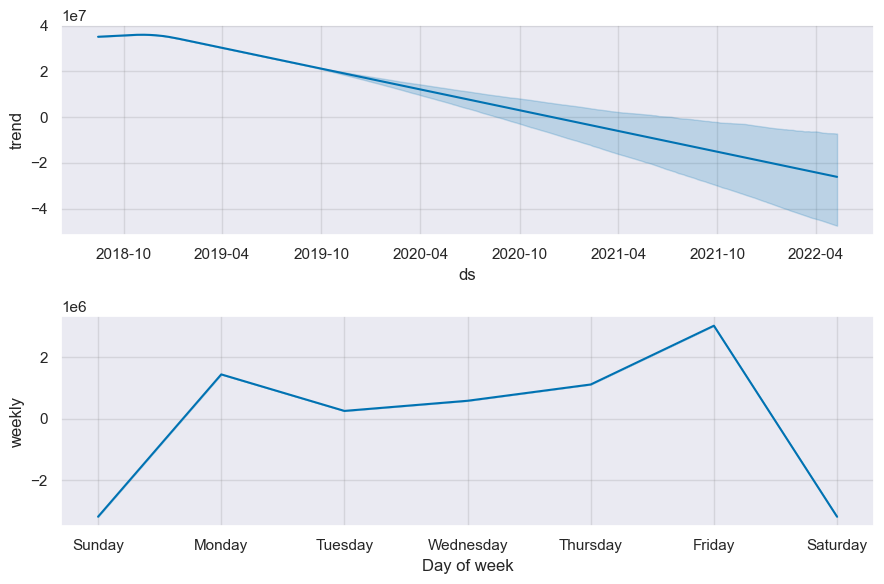

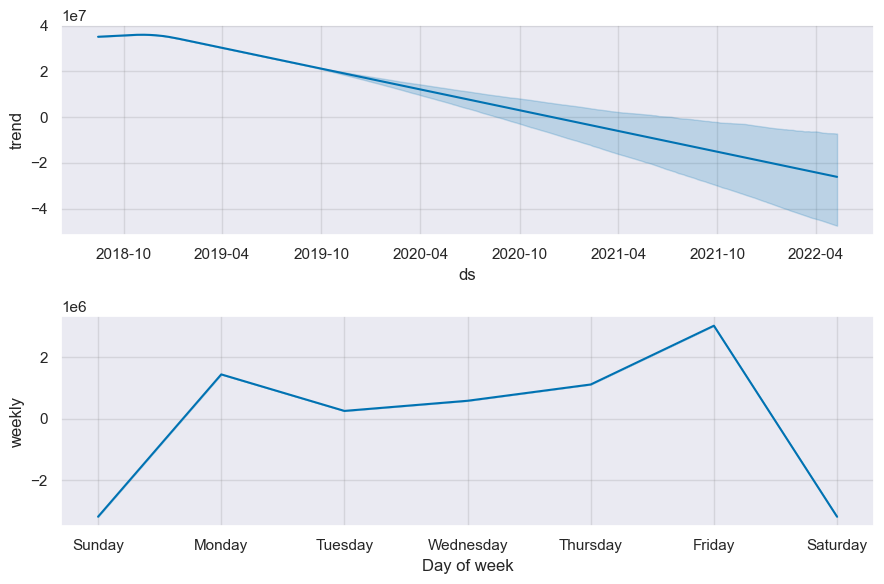

In [44]:
model.plot_components(predict)

In [45]:
new_data = pd.read_csv('adani_data.csv',thousands=",")
new_data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-2025,EQ,872.85,894.90,864.00,872.85,870.00,872.00,878.70,1348.0,588.0,3727492,3.275361e+09,103926
1,27-Mar-2025,EQ,803.00,882.45,796.05,803.00,870.00,872.85,850.80,1348.0,588.0,8208182,6.983485e+09,171217
2,26-Mar-2025,EQ,817.05,832.60,800.50,816.55,802.75,803.00,815.68,1348.0,588.0,2042407,1.665954e+09,46572
3,25-Mar-2025,EQ,822.00,838.90,812.35,820.25,814.10,816.55,825.46,1348.0,588.0,2713855,2.240184e+09,62271
4,24-Mar-2025,EQ,838.75,844.70,817.55,831.70,820.50,820.25,827.91,1348.0,588.0,1808999,1.497682e+09,55509


In [46]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           249 non-null    object 
 1   series         249 non-null    object 
 2   OPEN           249 non-null    float64
 3   HIGH           249 non-null    float64
 4   LOW            249 non-null    float64
 5   PREV. CLOSE    249 non-null    float64
 6   ltp            249 non-null    float64
 7   close          249 non-null    float64
 8   vwap           249 non-null    float64
 9   52W H          249 non-null    float64
 10  52W L          249 non-null    float64
 11  VOLUME         249 non-null    int64  
 12  VALUE          249 non-null    float64
 13  No of trades   249 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 27.4+ KB


In [47]:
new_data['Date '] = pd.to_datetime(new_data['Date '])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           249 non-null    datetime64[ns]
 1   series         249 non-null    object        
 2   OPEN           249 non-null    float64       
 3   HIGH           249 non-null    float64       
 4   LOW            249 non-null    float64       
 5   PREV. CLOSE    249 non-null    float64       
 6   ltp            249 non-null    float64       
 7   close          249 non-null    float64       
 8   vwap           249 non-null    float64       
 9   52W H          249 non-null    float64       
 10  52W L          249 non-null    float64       
 11  VOLUME         249 non-null    int64         
 12  VALUE          249 non-null    float64       
 13  No of trades   249 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 27.4+

In [48]:
new_data=new_data[['Date ','OPEN ']]
new_data.columns

Index(['Date ', 'OPEN '], dtype='object')

In [49]:
new_data.columns = ['ds','y']

In [50]:
model= Prophet()

In [51]:
model_adani = model.fit(new_data)

23:27:51 - cmdstanpy - INFO - Chain [1] start processing
23:27:51 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future_dates = model_adani.make_future_dataframe(periods=100)
future_dates

,ds
0,2024-04-01
1,2024-04-02
2,2024-04-03
3,2024-04-04
4,2024-04-05
...,...
344,2025-07-02
345,2025-07-03
346,2025-07-04
347,2025-07-05


In [53]:
predict_adani = model_adani.predict(future_dates)
predict_adani

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-04-01,1056.490000,985.277816,1132.599354,1056.490000,1056.490000,6.220547,6.220547,6.220547,6.220547,6.220547,6.220547,0.0,0.0,0.0,1062.710547
1,2024-04-02,1056.467234,977.726862,1135.592499,1056.467234,1056.467234,0.850841,0.850841,0.850841,0.850841,0.850841,0.850841,0.0,0.0,0.0,1057.318074
2,2024-04-03,1056.444467,982.897589,1141.792965,1056.444467,1056.444467,4.610511,4.610511,4.610511,4.610511,4.610511,4.610511,0.0,0.0,0.0,1061.054978
3,2024-04-04,1056.421701,978.771070,1130.280944,1056.421701,1056.421701,0.989313,0.989313,0.989313,0.989313,0.989313,0.989313,0.0,0.0,0.0,1057.411013
4,2024-04-05,1056.398935,986.313817,1131.605935,1056.398935,1056.398935,4.251693,4.251693,4.251693,4.251693,4.251693,4.251693,0.0,0.0,0.0,1060.650627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2025-07-02,664.635822,582.927473,753.204729,623.762131,705.376285,4.610511,4.610511,4.610511,4.610511,4.610511,4.610511,0.0,0.0,0.0,669.246333
345,2025-07-03,663.999417,581.983625,754.608365,622.293907,705.557687,0.989313,0.989313,0.989313,0.989313,0.989313,0.989313,0.0,0.0,0.0,664.988729
346,2025-07-04,663.363011,582.148633,758.694956,621.151714,705.501355,4.251693,4.251693,4.251693,4.251693,4.251693,4.251693,0.0,0.0,0.0,667.614704
347,2025-07-05,662.726606,565.936993,739.396050,619.667200,705.573205,-11.735771,-11.735771,-11.735771,-11.735771,-11.735771,-11.735771,0.0,0.0,0.0,650.990835


In [54]:
predict.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [55]:
df_var = predict_adani[['ds','yhat_lower', 'yhat_upper','yhat']]

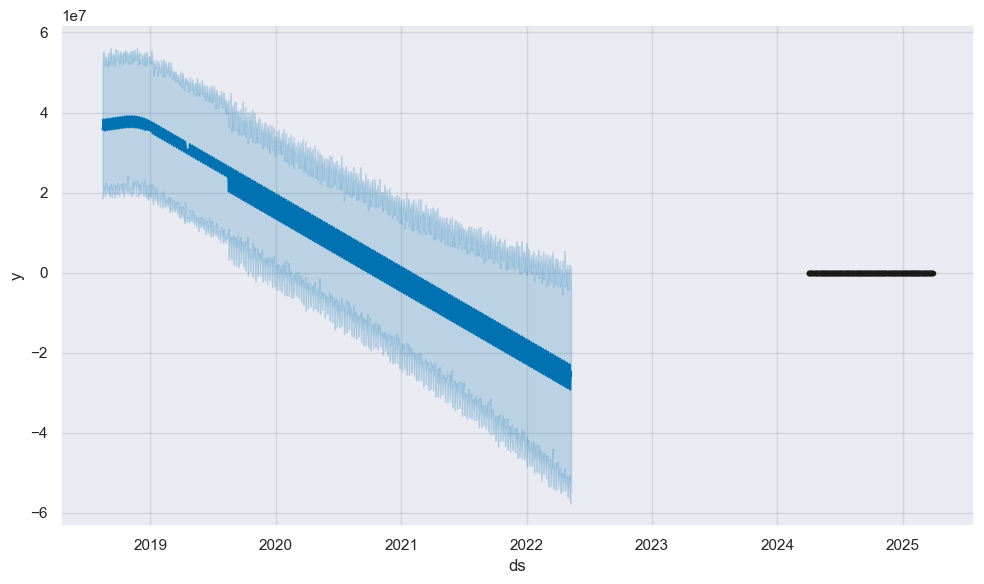

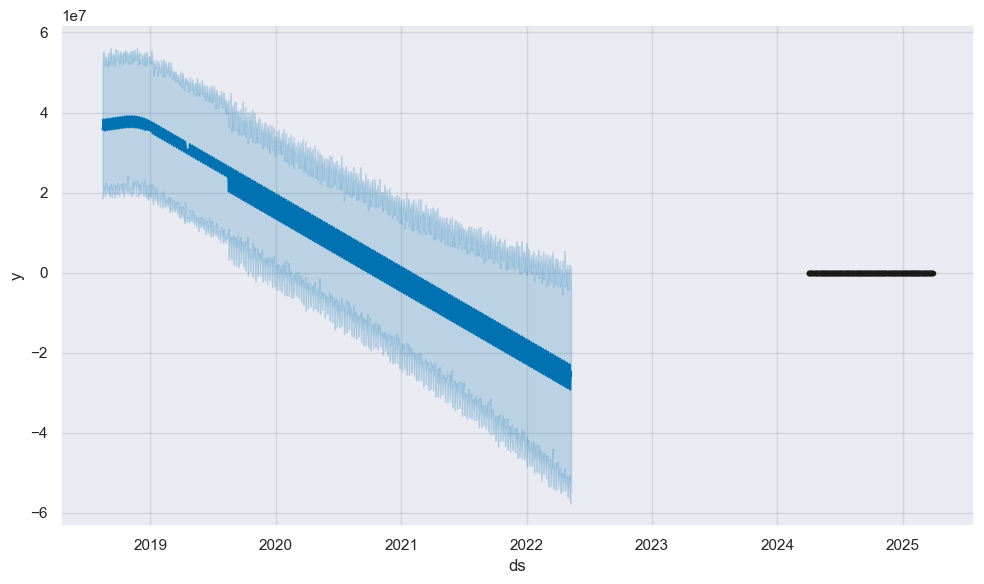

In [56]:
model_adani.plot(predict)

In [57]:
from prophet.diagnostics import performance_metrics, cross_validation

In [58]:
df_cv = cross_validation(model_adani,initial='200 days',period='50 days' , horizon = '100 days')

  0%|          | 0/2 [00:00<?, ?it/s]

23:27:54 - cmdstanpy - INFO - Chain [1] start processing
23:27:54 - cmdstanpy - INFO - Chain [1] done processing
23:27:55 - cmdstanpy - INFO - Chain [1] start processing
23:27:55 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,1285.624464,35.855606,30.094674,0.035138,0.038692,0.035763,1.000000
1,12 days,1651.882717,40.643360,33.344416,0.039412,0.038692,0.040459,0.928571
2,13 days,2212.653821,47.038854,37.379365,0.044350,0.039829,0.045921,0.857143
3,14 days,2992.048869,54.699624,45.286902,0.053817,0.041020,0.055684,0.714286
4,15 days,3791.180691,61.572564,52.462161,0.062080,0.052983,0.064389,0.642857
...,...,...,...,...,...,...,...,...
73,96 days,63942.342026,252.868231,218.212212,0.274007,0.172558,0.324085,0.000000
74,97 days,75444.389800,274.671422,244.755585,0.307289,0.296694,0.367725,0.000000
75,98 days,75778.781396,275.279461,243.690960,0.305479,0.312251,0.363990,0.000000
76,99 days,77885.049536,279.078931,246.831567,0.309524,0.314134,0.370231,0.000000


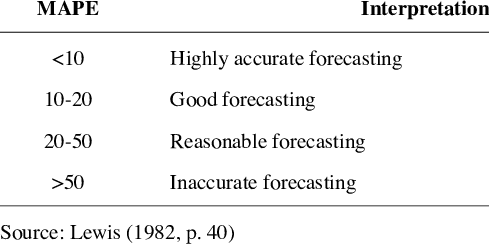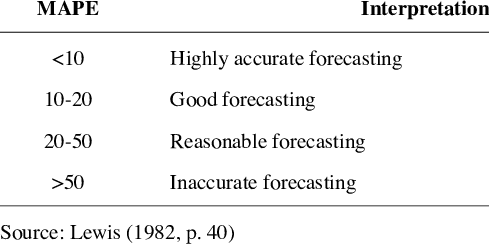

In [60]:
nhpc_data = pd.read_csv('NHPC.csv')
nhpc_data

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-2025,EQ,82.45,86.94,82.00,81.28,82.20,82.20,84.53,118.40,71.0,"7,23,67,264","6,11,72,00,295.01","1,80,358"
1,27-Mar-2025,EQ,80.60,82.27,80.00,80.94,81.82,81.28,81.17,118.40,71.0,"8,49,26,439","6,89,34,59,449.20","1,09,502"
2,26-Mar-2025,EQ,81.45,82.85,80.55,81.31,80.90,80.94,81.78,118.40,71.0,"2,00,90,934","1,64,29,73,080.68","76,066"
3,25-Mar-2025,EQ,84.30,84.65,80.75,83.62,81.21,81.31,82.12,118.40,71.0,"1,98,26,090","1,62,82,12,939.35","66,580"
4,24-Mar-2025,EQ,83.29,84.99,83.19,82.56,83.65,83.62,83.93,118.40,71.0,"1,98,69,482","1,66,76,23,249.91","65,446"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,05-Apr-2024,EQ,95.00,95.35,92.70,94.70,93.95,93.95,94.05,115.85,39.9,"7,42,66,481","6,98,50,45,086.90","1,77,056"
245,04-Apr-2024,EQ,93.80,95.50,93.40,93.20,94.90,94.70,94.40,115.85,39.9,"8,72,62,326","8,23,72,19,098.65","2,05,799"
246,03-Apr-2024,EQ,92.00,93.60,91.15,92.20,93.00,93.20,92.86,115.85,39.9,"7,54,80,238","7,00,92,90,616.05","1,77,375"
247,02-Apr-2024,EQ,90.95,92.85,89.60,90.50,92.15,92.20,91.45,115.85,39.9,"9,96,75,395","9,11,51,30,969.00","2,26,944"


In [61]:
nhpc_data.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [62]:
nhpc_data['Date '] = pd.to_datetime(nhpc_data['Date '])

In [63]:
nhpc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           249 non-null    datetime64[ns]
 1   series         249 non-null    object        
 2   OPEN           249 non-null    float64       
 3   HIGH           249 non-null    float64       
 4   LOW            249 non-null    float64       
 5   PREV. CLOSE    249 non-null    float64       
 6   ltp            249 non-null    float64       
 7   close          249 non-null    float64       
 8   vwap           249 non-null    float64       
 9   52W H          249 non-null    float64       
 10  52W L          249 non-null    float64       
 11  VOLUME         249 non-null    object        
 12  VALUE          249 non-null    object        
 13  No of trades   249 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 27.4+ KB


In [64]:
nhpc_data.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [65]:
nhpc = nhpc_data[['Date ','OPEN ']]
nhpc

,Date,OPEN
0,2025-03-28,82.45
1,2025-03-27,80.60
2,2025-03-26,81.45
3,2025-03-25,84.30
4,2025-03-24,83.29
...,...,...
244,2024-04-05,95.00
245,2024-04-04,93.80
246,2024-04-03,92.00
247,2024-04-02,90.95


In [66]:
nhpc.columns = ['ds','y']
nhpc

,ds,y
0,2025-03-28,82.45
1,2025-03-27,80.60
2,2025-03-26,81.45
3,2025-03-25,84.30
4,2025-03-24,83.29
...,...,...
244,2024-04-05,95.00
245,2024-04-04,93.80
246,2024-04-03,92.00
247,2024-04-02,90.95


In [67]:
model = Prophet()

In [68]:
model_nhpc= model.fit(nhpc)

23:27:56 - cmdstanpy - INFO - Chain [1] start processing
23:27:56 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future_dates = model_nhpc.make_future_dataframe(periods=100)
future_dates

,ds
0,2024-04-01
1,2024-04-02
2,2024-04-03
3,2024-04-04
4,2024-04-05
...,...
344,2025-07-02
345,2025-07-03
346,2025-07-04
347,2025-07-05


In [70]:
prediction_nhpc = model_nhpc.predict(future_dates)
prediction_nhpc

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-04-01,90.794038,86.522614,95.634500,90.794038,90.794038,0.212960,0.212960,0.212960,0.212960,0.212960,0.212960,0.0,0.0,0.0,91.006998
1,2024-04-02,90.965824,86.337927,95.472856,90.965824,90.965824,-0.178948,-0.178948,-0.178948,-0.178948,-0.178948,-0.178948,0.0,0.0,0.0,90.786876
2,2024-04-03,91.137610,86.094641,94.964078,91.137610,91.137610,-0.724815,-0.724815,-0.724815,-0.724815,-0.724815,-0.724815,0.0,0.0,0.0,90.412795
3,2024-04-04,91.309395,86.978534,95.565470,91.309395,91.309395,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,0.0,0.0,0.0,91.304525
4,2024-04-05,91.481181,86.717595,96.097140,91.481181,91.481181,0.013011,0.013011,0.013011,0.013011,0.013011,0.013011,0.0,0.0,0.0,91.494192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2025-07-02,74.390723,66.133127,80.280879,69.222996,79.188604,-0.724815,-0.724815,-0.724815,-0.724815,-0.724815,-0.724815,0.0,0.0,0.0,73.665909
345,2025-07-03,74.363849,67.287476,80.726785,69.140232,79.239224,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,-0.004871,0.0,0.0,0.0,74.358979
346,2025-07-04,74.336976,67.108231,81.289270,69.080328,79.270867,0.013011,0.013011,0.013011,0.013011,0.013011,0.013011,0.0,0.0,0.0,74.349987
347,2025-07-05,74.310102,67.864472,81.995029,68.955228,79.297370,0.836198,0.836198,0.836198,0.836198,0.836198,0.836198,0.0,0.0,0.0,75.146300


In [71]:
prediction_nhpc.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

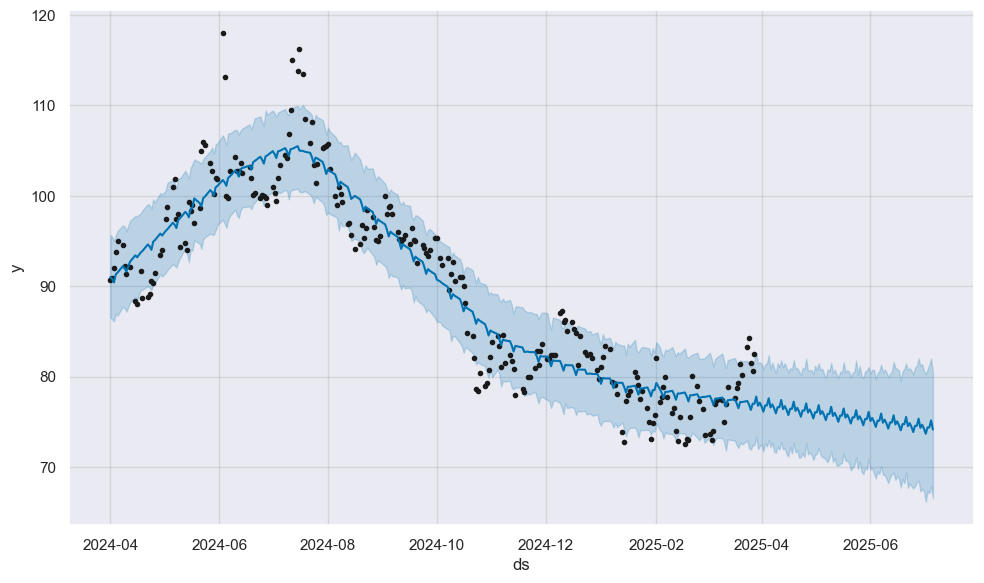

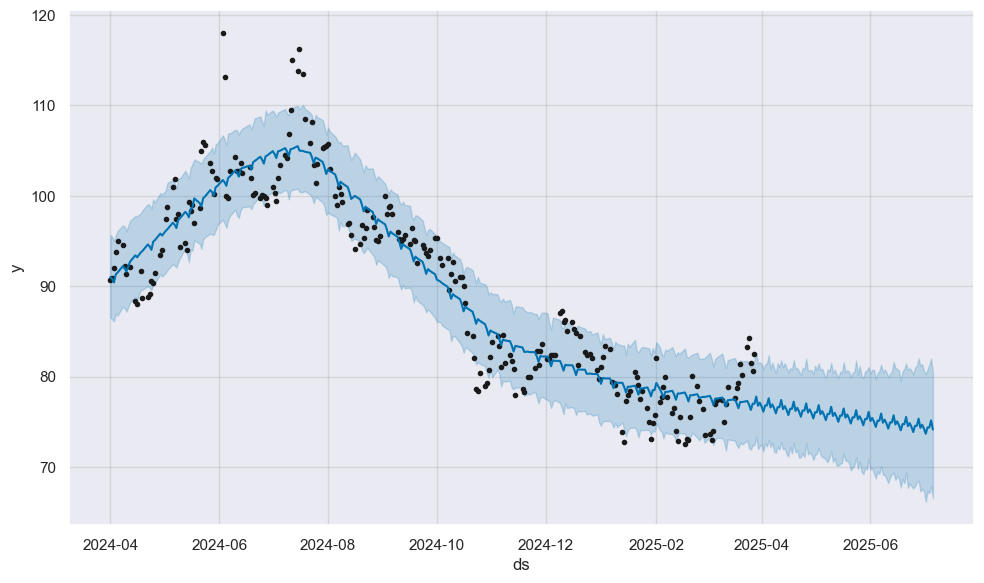

In [72]:
model_nhpc.plot(prediction_nhpc)

In [73]:
from prophet.diagnostics import cross_validation,performance_metrics

In [74]:
df_cv = cross_validation(model_nhpc,initial='200 days',period='50 days' , horizon = '100 days')

  0%|          | 0/2 [00:00<?, ?it/s]

23:27:59 - cmdstanpy - INFO - Chain [1] start processing
23:27:59 - cmdstanpy - INFO - Chain [1] done processing
23:27:59 - cmdstanpy - INFO - Chain [1] start processing
23:27:59 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
df_cv = performance_metrics(df_cv)
df_cv

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,2.592117,1.610005,1.336257,0.016120,0.014725,0.016198,1.000000
1,12 days,2.352767,1.533873,1.266321,0.015253,0.014288,0.015350,1.000000
2,13 days,1.712556,1.308647,1.106679,0.013350,0.012823,0.013443,1.000000
3,14 days,1.341505,1.158234,1.027510,0.012451,0.012823,0.012533,1.000000
4,15 days,1.414857,1.189478,1.041270,0.012653,0.010541,0.012741,1.000000
...,...,...,...,...,...,...,...,...
73,96 days,134.866405,11.613200,10.347491,0.132923,0.158180,0.145166,0.357143
74,97 days,129.599203,11.384165,10.110992,0.129375,0.134623,0.141083,0.357143
75,98 days,146.473440,12.102621,11.093863,0.141624,0.134623,0.154842,0.321429
76,99 days,161.318525,12.701123,11.662960,0.148275,0.134623,0.162788,0.321429


In [76]:
df_cv['mape'].mean()

0.07329629470207183

In [77]:
reliance = pd.read_csv('Reliance.csv')
reliance.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,09-Apr-2025,EQ,"1,169.50","1,189.80","1,168.00","1,182.20","1,187.50","1,185.35","1,183.08","3,217.60","1,114.85","1,02,23,104","12,09,47,49,463.20","1,93,325"
1,08-Apr-2025,EQ,"1,172.00","1,196.60","1,163.30","1,165.70","1,181.05","1,182.20","1,179.50","3,217.60","1,114.85","1,95,55,040","23,06,52,09,423.00","3,14,171"
2,07-Apr-2025,EQ,"1,132.20","1,171.25","1,114.85","1,204.70","1,171.25","1,165.70","1,150.54","3,217.60","1,114.85","2,21,56,106","25,49,15,01,838.90","6,77,564"
3,04-Apr-2025,EQ,"1,241.10","1,245.45","1,193.15","1,248.70","1,205.90","1,204.70","1,206.62","3,217.60","1,156.00","1,79,08,652","21,60,89,77,995.10","5,42,347"
4,03-Apr-2025,EQ,"1,233.05","1,251.80","1,233.05","1,251.15","1,248.50","1,248.70","1,246.31","3,217.60","1,156.00","74,34,366","9,26,55,30,670.85","1,46,316"


In [78]:
reliance.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [79]:
reliance['Date '] =pd.to_datetime(reliance['Date '])


In [80]:
reliance.dtypes

Date             datetime64[ns]
series                   object
OPEN                     object
HIGH                     object
LOW                      object
PREV. CLOSE              object
ltp                      object
close                    object
vwap                     object
52W H                    object
52W L                    object
VOLUME                   object
VALUE                    object
No of trades             object
dtype: object

In [81]:
reliance['OPEN '] = reliance['OPEN '].str.replace(',', '', regex=False).astype(float)


In [82]:
reliance_data = reliance[['Date ','OPEN ']]
reliance_data

,Date,OPEN
0,2025-04-09,1169.50
1,2025-04-08,1172.00
2,2025-04-07,1132.20
3,2025-04-04,1241.10
4,2025-04-03,1233.05
...,...,...
244,2024-04-18,2927.00
245,2024-04-16,2906.70
246,2024-04-15,2922.00
247,2024-04-12,2951.75


In [83]:
reliance_data.columns=['ds','y']

In [84]:
reliance_data

,ds,y
0,2025-04-09,1169.50
1,2025-04-08,1172.00
2,2025-04-07,1132.20
3,2025-04-04,1241.10
4,2025-04-03,1233.05
...,...,...
244,2024-04-18,2927.00
245,2024-04-16,2906.70
246,2024-04-15,2922.00
247,2024-04-12,2951.75


In [85]:
model_reliance = Prophet()
model_reliance.fit(reliance_data)
feature_dates = model_reliance.make_future_dataframe(periods=100)
feature_dates

23:28:00 - cmdstanpy - INFO - Chain [1] start processing
23:28:00 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2024-04-10
1,2024-04-12
2,2024-04-15
3,2024-04-16
4,2024-04-18
...,...
344,2025-07-14
345,2025-07-15
346,2025-07-16
347,2025-07-17


In [86]:
predict_reliance = model_reliance.predict(feature_dates)
predict_reliance

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-04-10,2892.062841,2652.721683,3129.907137,2892.062841,2892.062841,-12.549022,-12.549022,-12.549022,-12.549022,-12.549022,-12.549022,0.0,0.0,0.0,2879.513819
1,2024-04-12,2894.391303,2666.986358,3142.315628,2894.391303,2894.391303,15.317486,15.317486,15.317486,15.317486,15.317486,15.317486,0.0,0.0,0.0,2909.708790
2,2024-04-15,2897.883997,2668.036980,3138.768775,2897.883997,2897.883997,-1.506887,-1.506887,-1.506887,-1.506887,-1.506887,-1.506887,0.0,0.0,0.0,2896.377110
3,2024-04-16,2899.048228,2657.751350,3144.010071,2899.048228,2899.048228,-3.631775,-3.631775,-3.631775,-3.631775,-3.631775,-3.631775,0.0,0.0,0.0,2895.416453
4,2024-04-18,2901.376691,2668.285545,3142.545744,2901.376691,2901.376691,1.641336,1.641336,1.641336,1.641336,1.641336,1.641336,0.0,0.0,0.0,2903.018027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2025-07-14,1185.185424,690.044184,1744.603642,746.033070,1678.351877,-1.506887,-1.506887,-1.506887,-1.506887,-1.506887,-1.506887,0.0,0.0,0.0,1183.678538
345,2025-07-15,1184.910737,652.321097,1721.947155,735.694022,1686.948789,-3.631775,-3.631775,-3.631775,-3.631775,-3.631775,-3.631775,0.0,0.0,0.0,1181.278962
346,2025-07-16,1184.636049,673.503116,1720.314926,724.862525,1693.833325,-12.549022,-12.549022,-12.549022,-12.549022,-12.549022,-12.549022,0.0,0.0,0.0,1172.087026
347,2025-07-17,1184.361361,679.980682,1725.088855,713.297114,1703.670333,1.641336,1.641336,1.641336,1.641336,1.641336,1.641336,0.0,0.0,0.0,1186.002697


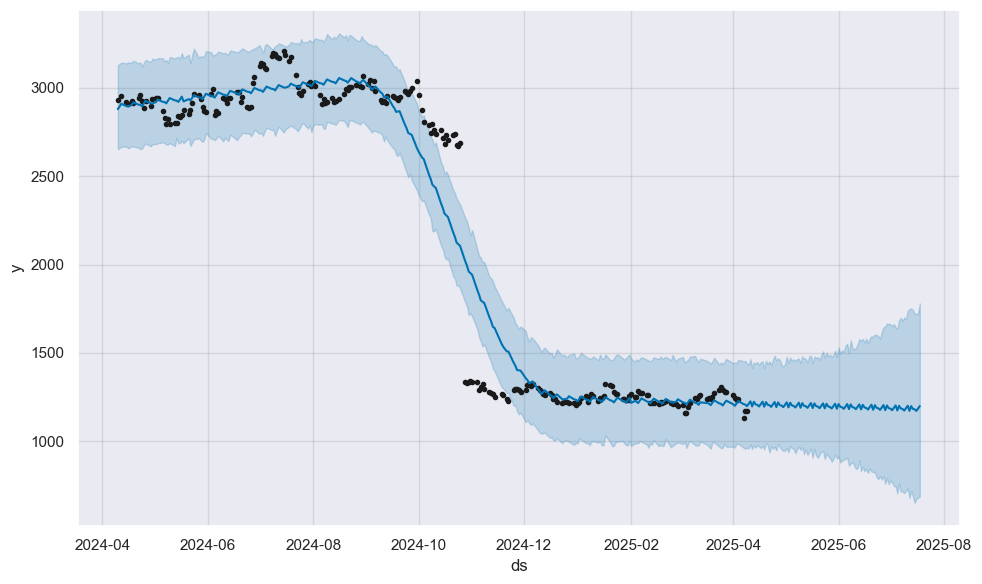

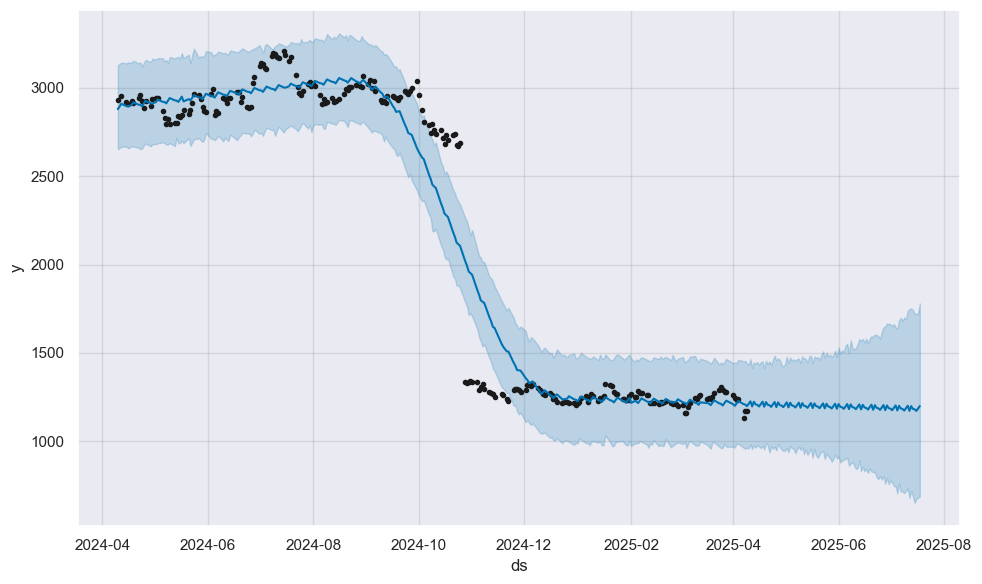

In [87]:
model_reliance.plot(predict_reliance)

In [88]:
df_cv = cross_validation(model_reliance,initial='200 days',period='50 days' , horizon = '100 days')

  0%|          | 0/2 [00:00<?, ?it/s]

23:28:03 - cmdstanpy - INFO - Chain [1] start processing
23:28:03 - cmdstanpy - INFO - Chain [1] done processing
23:28:03 - cmdstanpy - INFO - Chain [1] start processing
23:28:04 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
df_cv = performance_metrics(df_cv)
df_cv

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,2.237067e+05,472.976408,452.715678,0.363171,0.375709,0.425409,0.142857
1,11 days,2.317040e+05,481.356368,452.925293,0.362964,0.393074,0.435275,0.214286
2,12 days,2.207611e+05,469.852211,435.272981,0.348838,0.393074,0.418356,0.285714
3,14 days,2.434753e+05,493.432167,455.375973,0.365402,0.398218,0.449580,0.285714
4,15 days,2.602776e+05,510.174100,454.282258,0.364321,0.436807,0.462951,0.357143
...,...,...,...,...,...,...,...,...
73,95 days,4.421125e+06,2102.647135,2088.676055,1.661102,1.586644,2.000000,0.000000
74,96 days,4.397832e+06,2097.100954,2084.190548,1.662352,1.594080,2.000000,0.000000
75,98 days,4.489270e+06,2118.789824,2105.823068,1.696384,1.594080,2.000000,0.000000
76,99 days,4.596907e+06,2144.039823,2131.468902,1.735077,1.635954,2.000000,0.000000


In [90]:
#adani - model
#model_reliance
#model_nhpc

In [94]:
import joblib

joblib.dump(model_reliance, 'reliance_stock.pkl')

['reliance_stock.pkl']

In [95]:
joblib.dump(model_adani, 'adani_stock.pkl')


['adani_stock.pkl']

In [96]:
joblib.dump(model_nhpc, 'nhpc_stock.pkl')

['nhpc_stock.pkl']